## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [2]:
import pickle
import numpy as np

with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [3]:
#Обучаем KMeans-кластеризацию
from sklearn.cluster  import KMeans
model = KMeans(n_clusters=4).fit(X)

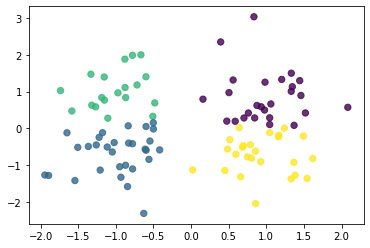

In [4]:
#Визуализируем результаты
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=40, c=model.labels_, marker='o', alpha=0.8)
plt.show()

In [5]:
#Вычислеям метрику силуэтта
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_)
print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.442


In [7]:
model1 = KMeans(n_clusters=2, random_state=1).fit(X)
model2 = KMeans(n_clusters=3, random_state=1).fit(X)
model3 = KMeans(n_clusters=4, random_state=1).fit(X)
print('Количество кластеров k = 2, метрика Силуэтта = %.3f' %silhouette_score(X, model1.labels_))
print('Количество кластеров k = 3, метрика Силуэтта = %.3f' %silhouette_score(X, model2.labels_))
print('Количество кластеров k = 4, метрика Силуэтта = %.3f' %silhouette_score(X, model3.labels_))

Количество кластеров k = 2, метрика Силуэтта = 0.447
Количество кластеров k = 3, метрика Силуэтта = 0.452
Количество кластеров k = 4, метрика Силуэтта = 0.442


## Вывод:
Лучшая Метрика Силуэтта при к = 3, худшая мерика при к = 4.


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [9]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

model = KMeans(n_clusters=4).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.582


In [13]:
model1 = KMeans(n_clusters=2, random_state=2).fit(X)
model2 = KMeans(n_clusters=3, random_state=2).fit(X)
model3 = KMeans(n_clusters=4, random_state=2).fit(X)
print('Количество кластеров k = 2, метрика AMI = %.3f' %adjusted_mutual_info_score(Y, model1.labels_, average_method='arithmetic'))
print('Количество кластеров k = 3, метрика AMI = %.3f' %adjusted_mutual_info_score(Y, model2.labels_, average_method='arithmetic'))
print('Количество кластеров k = 4, метрика AMI = %.3f' %adjusted_mutual_info_score(Y, model3.labels_, average_method='arithmetic'))

Количество кластеров k = 2, метрика AMI = 0.929
Количество кластеров k = 3, метрика AMI = 0.614
Количество кластеров k = 4, метрика AMI = 0.583


## Вывод:
Лучшая метрика AMI для k=2.


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [42]:
import pandas as pd

data_hw = pd.read_csv('7.10_clustering_hw.csv')

X = np.array(data_hw[['x1','x2']])
Y = np.array(data_hw['y'])

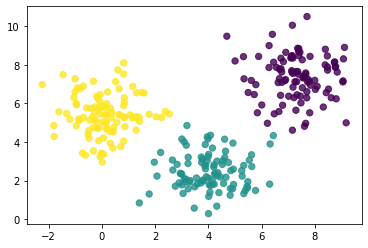

In [43]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=model.labels_, marker='o', alpha=0.8)
plt.show()

In [32]:
#Обучаю модель с разным кол-вом кластеров
best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k).fit(X)
    score = silhouette_score(X, kmeans_model.labels_)
    print(f'На итерации {k} метрика силуэтта {round(score, 3)}')
    if score > best_score:
        best_score = score
        best_k = k
print(f'Лучший результат: {best_k} кластер с метрикой силуэтта {round(best_score, 3)}')


На итерации 2 метрика силуэтта 0.564
На итерации 3 метрика силуэтта 0.651
На итерации 4 метрика силуэтта 0.534
На итерации 5 метрика силуэтта 0.419
На итерации 6 метрика силуэтта 0.312
На итерации 7 метрика силуэтта 0.346
На итерации 8 метрика силуэтта 0.329
На итерации 9 метрика силуэтта 0.347
На итерации 10 метрика силуэтта 0.336
Лучший результат: 3 кластер с метрикой силуэтта 0.651


In [37]:
#Получаем модель для варианта с наилучшей метрикой
kmeans_model = KMeans(n_clusters=best_k).fit(X)

data = [[5, 8]]
print(f'Для точки {data} предсказанный кластер {kmeans_model.predict(data)[0]}')

data = [[0, 5]]
print(f'Для точки {data} предсказанный кластер {kmeans_model.predict(data)[0]}')

Для точки [[5, 8]] предсказанный кластер 1
Для точки [[0, 5]] предсказанный кластер 0


## Вывод:
Данные 2 точки принадлежат к разным кластерам.



### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)